In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.2.0


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

## Classification with Logistic Regression

In [5]:
# Load in data and make validation set

In [6]:
# Creat logistic regression using a sequential model.

# complie the model with the adam optimizer, binary_crossentropy loss and accuracy as the metric

# fit the model with 100 epochs

# evaluate the loss and accuracy for train and test sets

In [7]:
#plot the loss with epochs in the x-axis

## Linear Regression

In [9]:
# use the SGD optimizer on mse
#

In [11]:
data = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv')

In [22]:
# Tensorflow likes N x D arrays
X = data.values[:,0].reshape(-1, 1) # Now an N x D array, D = 1
Y = data.values[:,1]

In [23]:
Y = np.log(Y)

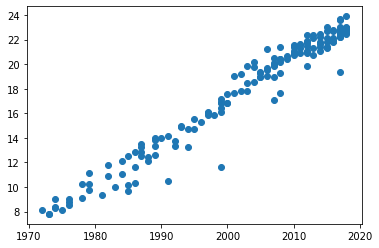

In [24]:
plt.scatter(X, Y);

In [25]:
X = X - X.mean()

In [27]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')

# Learning rate scheduler
def schedule(epoch, learning_rate):
    if epoch >= 50:
        return 0.0001
    return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 1ms/step - loss: 488.3988 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 654.5054 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 585.9905 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 349.4143 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 191.7277 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 3ms/step - loss: 130.0455 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 99.2481 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 116.9513 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 66.9992 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 46.2119 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 3ms/step - loss: 

6/6 [==============================] - 0s 2ms/step - loss: 0.8865 - lr: 1.0000e-04
Epoch 89/200
6/6 [==============================] - 0s 3ms/step - loss: 0.8837 - lr: 1.0000e-04
Epoch 90/200
6/6 [==============================] - 0s 3ms/step - loss: 0.8751 - lr: 1.0000e-04
Epoch 91/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8754 - lr: 1.0000e-04
Epoch 92/200
6/6 [==============================] - 0s 1ms/step - loss: 0.8764 - lr: 1.0000e-04
Epoch 93/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8766 - lr: 1.0000e-04
Epoch 94/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8895 - lr: 1.0000e-04
Epoch 95/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8917 - lr: 1.0000e-04
Epoch 96/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8840 - lr: 1.0000e-04
Epoch 97/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8757 - lr: 1.0000e-04
Epoch 98/200
6/6 [==============================] - 0

6/6 [==============================] - 0s 2ms/step - loss: 0.8734 - lr: 1.0000e-04
Epoch 173/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8734 - lr: 1.0000e-04
Epoch 174/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8738 - lr: 1.0000e-04
Epoch 175/200
6/6 [==============================] - 0s 2ms/step - loss: 0.9723 - lr: 1.0000e-04
Epoch 176/200
6/6 [==============================] - 0s 2ms/step - loss: 1.0415 - lr: 1.0000e-04
Epoch 177/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8753 - lr: 1.0000e-04
Epoch 178/200
6/6 [==============================] - 0s 1ms/step - loss: 0.8982 - lr: 1.0000e-04
Epoch 179/200
6/6 [==============================] - 0s 1ms/step - loss: 0.9145 - lr: 1.0000e-04
Epoch 180/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8790 - lr: 1.0000e-04
Epoch 181/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8817 - lr: 1.0000e-04
Epoch 182/200
6/6 [=========================

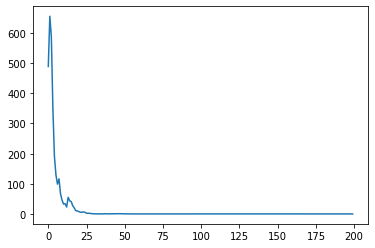

In [28]:
plt.plot(r.history['loss'])

In [29]:
print(model.layers)

In [30]:
print(model.layers[0].get_weights())

[array([[0.34524462]], dtype=float32), array([17.827255], dtype=float32)]


In [31]:
a = model.layers[0].get_weights()[0][0,0]

In [32]:
a

0.34524462

In [33]:
#C = A_0r^t === logC = logr*t+log a_0

In [34]:
# Regression with normal equations.